In [ ]:
# Sahar Zaker Soltani 
# PROJECT: "MNIST Digit Classification: Optimizing RF, KNN & SVM with Grid Search and Hard Voting"

In [7]:
# Step 1: Load MNIST dataset and split into train/validation/test sets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

In [8]:
# Load MNIST (this may take a minute)
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [9]:
# Extract features and labels
X, y = mnist["data"], mnist["target"]

In [10]:
# Convert labels to integers
y = y.astype(np.uint8)

In [11]:
# Limit to 15,000 samples (random selection)
np.random.seed(42)  # for reproducibility
random_indices = np.random.permutation(len(X))[:15000]
X = X[random_indices]
y = y[random_indices]

In [12]:
# Split into train (80%), validation (10%), and test (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [13]:
# Print dataset sizes
print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

Training set: 12000 samples
Validation set: 1500 samples
Test set: 1500 samples


In [14]:
# Verify proportions
assert len(X_train) == 12000  # 80% of 15,000
assert len(X_val) == 1500     # 10% of 15,000
assert len(X_test) == 1500    # 10% of 15,000

In [15]:
# Key points:
# We load MNIST using scikit-learn's fetch_openml
# We randomly select 15,000 samples from the full dataset
# We split:
# 1. 80% (12,000) for training
# 2. 10% (1,500) for validation
# 3. 10% (1,500) for testing
# We set random seeds (42) for reproducibility

In [16]:
# Step 2: Train Random Forest, KNN, and SVM classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [17]:
# Initialize classifiers
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
knn_clf = KNeighborsClassifier()
svm_clf = SVC(kernel='rbf', gamma='scale', random_state=42)

In [18]:
# Train classifiers
print("Training Random Forest...")
rf_clf.fit(X_train, y_train)

print("Training KNN...")
knn_clf.fit(X_train, y_train)

print("Training SVM... (This may take several minutes)")
svm_clf.fit(X_train, y_train)

Training Random Forest...
Training KNN...
Training SVM... (This may take several minutes)


SVC(random_state=42)

In [19]:
# Evaluate on validation set
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    return accuracy_score(y_val, y_pred)

rf_val_acc = evaluate_model(rf_clf, X_val, y_val)
knn_val_acc = evaluate_model(knn_clf, X_val, y_val)
svm_val_acc = evaluate_model(svm_clf, X_val, y_val)

print("\nValidation Accuracy Scores:")
print(f"Random Forest: {rf_val_acc:.4f}")
print(f"KNN: {knn_val_acc:.4f}")
print(f"SVM: {svm_val_acc:.4f}")


Validation Accuracy Scores:
Random Forest: 0.9513
KNN: 0.9593
SVM: 0.9680


In [20]:
# Step 3: Hyperparameter Tuning with Grid Search
from sklearn.model_selection import GridSearchCV
import numpy as np

In [21]:
# 1. Random Forest Tuning
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                      rf_params, cv=3, n_jobs=-1, verbose=2)
rf_grid.fit(X_train[:5000], y_train[:5000])  # Subsample for speed

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [22]:
# 2. KNN Tuning
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}
knn_grid = GridSearchCV(KNeighborsClassifier(),
                       knn_params, cv=3, n_jobs=-1, verbose=2)
knn_grid.fit(X_train[:5000], y_train[:5000])


Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [23]:
# 3. SVM Tuning (RBF Kernel)
svm_params = {
    'C': [1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01]
}
svm_grid = GridSearchCV(SVC(random_state=42),
                       svm_params, cv=3, n_jobs=-1, verbose=2)
svm_grid.fit(X_train[:5000], y_train[:5000])

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [1, 10, 100],
                         'gamma': ['scale', 'auto', 0.001, 0.01]},
             verbose=2)

In [24]:
# Print best parameters
print("\nBest Parameters:")
print(f"Random Forest: {rf_grid.best_params_}")
print(f"KNN: {knn_grid.best_params_}")
print(f"SVM: {svm_grid.best_params_}")


Best Parameters:
Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
KNN: {'n_neighbors': 3, 'weights': 'distance'}
SVM: {'C': 10, 'gamma': 'scale'}


In [25]:
# Evaluate optimized models on validation set
print("\nOptimized Validation Accuracy:")
print(f"Random Forest: {rf_grid.score(X_val, y_val):.4f}")
print(f"KNN: {knn_grid.score(X_val, y_val):.4f}")
print(f"SVM: {svm_grid.score(X_val, y_val):.4f}")


Optimized Validation Accuracy:
Random Forest: 0.9407
KNN: 0.9467
SVM: 0.9540


In [26]:
best_svm = SVC(**svm_grid.best_params_)
best_svm.fit(X_train, y_train)  # Full training set

SVC(C=10)

In [49]:
# Step 4: Generate Confusion Matrices for All Models
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=range(10), yticklabels=range(10))
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


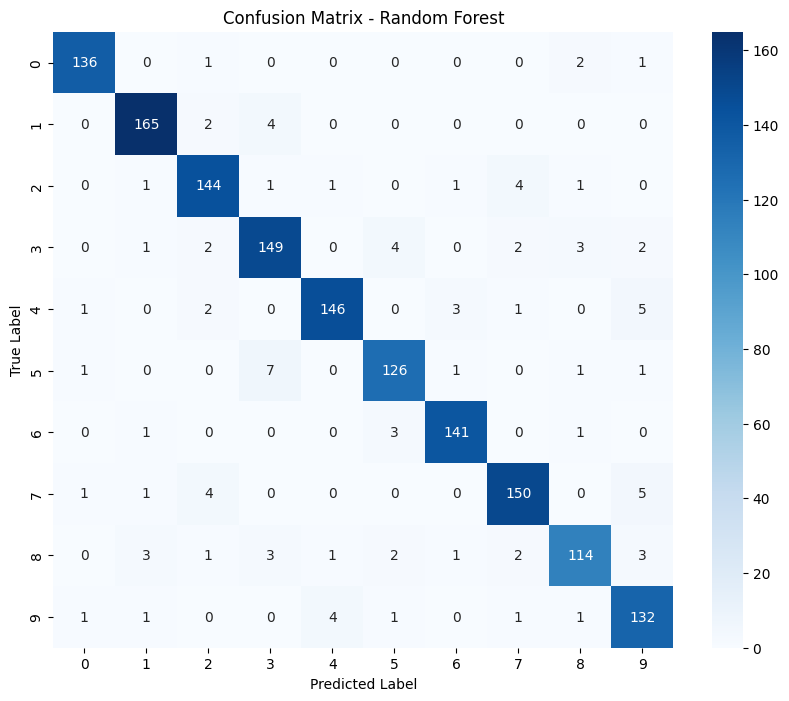

In [51]:
# 1. Random Forest
y_pred_rf = rf_grid.best_estimator_.predict(X_test)
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')


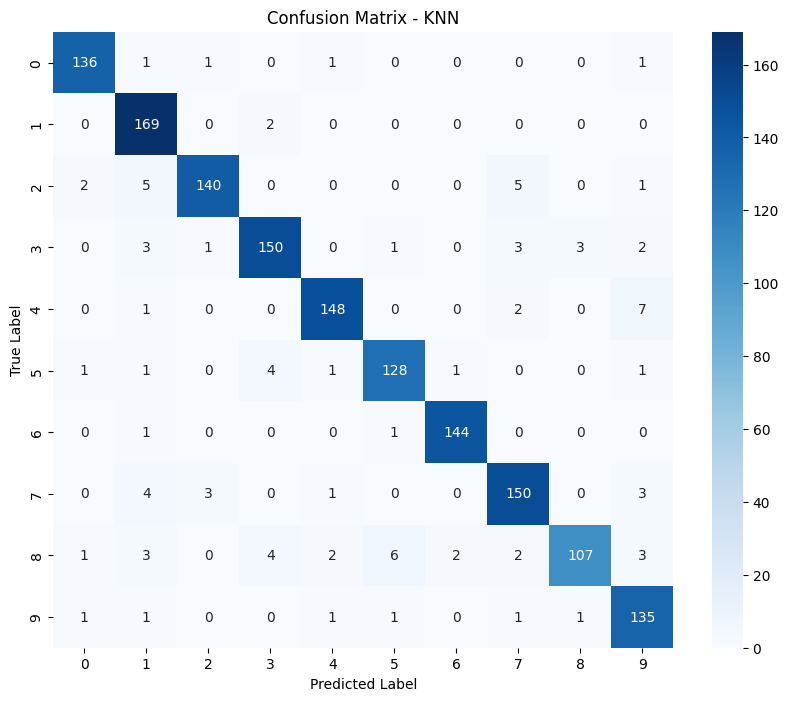

In [52]:
# 2. KNN
y_pred_knn = knn_grid.best_estimator_.predict(X_test)
plot_confusion_matrix(y_test, y_pred_knn, 'KNN')

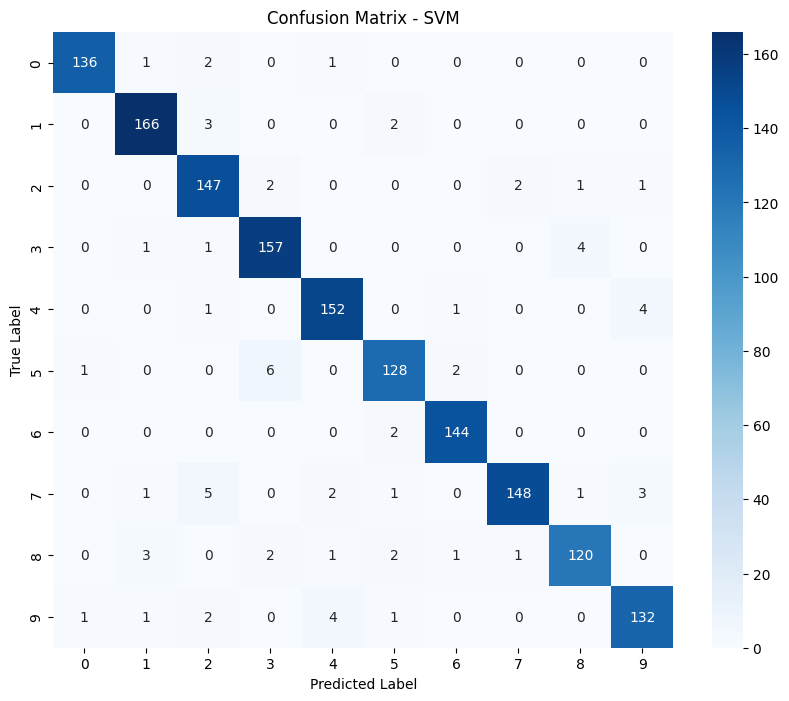

In [53]:
# 3. SVM
y_pred_svm = svm_grid.best_estimator_.predict(X_test)
plot_confusion_matrix(y_test, y_pred_svm, 'SVM')

In [54]:
# Print classification reports
from sklearn.metrics import classification_report
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf))
print("\nKNN Report:\n", classification_report(y_test, y_pred_knn))
print("\nSVM Report:\n", classification_report(y_test, y_pred_svm))


Random Forest Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       140
           1       0.95      0.96      0.96       171
           2       0.92      0.94      0.93       153
           3       0.91      0.91      0.91       163
           4       0.96      0.92      0.94       158
           5       0.93      0.92      0.92       137
           6       0.96      0.97      0.96       146
           7       0.94      0.93      0.93       161
           8       0.93      0.88      0.90       130
           9       0.89      0.94      0.91       141

    accuracy                           0.94      1500
   macro avg       0.94      0.93      0.93      1500
weighted avg       0.94      0.94      0.94      1500


KNN Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       140
           1       0.89      0.99      0.94       171
           2       0.97      0.92      0

In [56]:
# Step 5: Hard Voting Classifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [57]:
# 1. Get the optimized models from GridSearch
best_rf = rf_grid.best_estimator_
best_knn = knn_grid.best_estimator_
best_svm = svm_grid.best_estimator_

In [58]:
# 2. Create voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', best_rf),
        ('knn', best_knn),
        ('svm', best_svm)],
    voting='hard'  # Hard voting (majority class)
)

In [59]:
# 3. Train on full training set
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=42)),
                             ('knn',
                              KNeighborsClassifier(n_neighbors=3,
                                                   weights='distance')),
                             ('svm', SVC(C=10, random_state=42))])

In [60]:
# 4. Evaluate on validation set
y_val_pred = voting_clf.predict(X_val)
voting_acc = accuracy_score(y_val, y_val_pred)

print("\nIndividual Model Validation Accuracies:")
print(f"Random Forest: {rf_grid.score(X_val, y_val):.4f}")
print(f"KNN: {knn_grid.score(X_val, y_val):.4f}")
print(f"SVM: {svm_grid.score(X_val, y_val):.4f}")
print(f"\nVoting Classifier Accuracy: {voting_acc:.4f}")



Individual Model Validation Accuracies:
Random Forest: 0.9407
KNN: 0.9467
SVM: 0.9540

Voting Classifier Accuracy: 0.9673


In [61]:
# 5. Test set evaluation (final performance)
y_test_pred = voting_clf.predict(X_test)
print(f"\nTest Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")


Test Accuracy: 0.9673


In [93]:
# Step 6: Fixed Voting Classifier Implementation
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report


In [94]:
# 1. First ensure all individual models are fitted
rf_model = rf_grid.best_estimator_.fit(X_train, y_train)
knn_model = knn_grid.best_estimator_.fit(X_train, y_train)
svm_model = svm_grid.best_estimator_.fit(X_train, y_train)


In [95]:
# 2. Create and fit the VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('knn', knn_model),
        ('svm', svm_model)
    ],
    voting='hard'
)
voting_clf.fit(X_train, y_train)  # This creates the estimators_ attribute


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=42)),
                             ('knn',
                              KNeighborsClassifier(n_neighbors=3,
                                                   weights='distance')),
                             ('svm', SVC(C=10, random_state=42))])

In [96]:
# 3. Now we can safely evaluate
test_acc = voting_clf.score(X_test, y_test)


In [97]:
# 4. Compare all models
model_comparison = {
    "Random Forest": rf_model.score(X_test, y_test),
    "KNN": knn_model.score(X_test, y_test),
    "SVM": svm_model.score(X_test, y_test),
    "Voting Classifier": test_acc
}

print("Test Set Performance:")
for model, acc in sorted(model_comparison.items(), key=lambda x: -x[1]):
    print(f"{model}: {acc:.4f}")


Test Set Performance:
SVM: 0.9700
Voting Classifier: 0.9673
KNN: 0.9560
Random Forest: 0.9480


In [98]:
# 5. Show voting classifier details
print("\nVoting Classifier Estimators:")
print(voting_clf.estimators_)  # Now this will work


Voting Classifier Estimators:
[RandomForestClassifier(n_estimators=200, random_state=42), KNeighborsClassifier(n_neighbors=3, weights='distance'), SVC(C=10, random_state=42)]


In [99]:
print("\nModel Fitting Status:")
print(f"RF fitted: {hasattr(rf_model, 'classes_')}")
print(f"KNN fitted: {hasattr(knn_model, 'classes_')}")
print(f"SVM fitted: {hasattr(svm_model, 'classes_')}")
print(f"Voting fitted: {hasattr(voting_clf, 'estimators_')}")


Model Fitting Status:
RF fitted: True
KNN fitted: True
SVM fitted: True
Voting fitted: True
